In [1]:
import numpy as np
seed = 14
np.random.seed(seed)
import keras 
from keras import backend as K, activations
from keras.models import Sequential, Model
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from preprocessing import*
import numpy as np
from keras.layers import Input, Dense, Activation, Dropout
from numpy.random import seed as set_seed
from sklearn.model_selection import train_test_split

Normalized GE
Number of genes: 414
Number of samples: 2441
{'IFNb': 432, 'LPS': 806, 'dNS1': 469, 'unstim': 734}


In [2]:
features

geo_accession,immvar_id,stimulation,hours,plate,cartridge,lane,date_of_visit,time_of_visit,gender,age,ethnicity,million _pbmc,cd14,cd16,million _dcs,height,weight,systolic_diastolic,bmi
GSM1283355,1627V021412,LPS,2.5,L2a,n98,1,14/02/2012,8:22 AM,F,38,African-American,45.515248,94.5,0.3,0.27,171,61.4,90/62,20.99791389
GSM1283356,1687V021512,LPS,2.5,L2a,n98,2,15/02/2012,7:50 AM,M,31,African-American,39.6973275,92.1,0.8,0.2592,168,79.35,112/76,28.11437075
GSM1283357,1688V021512,LPS,2.5,L2a,n98,3,15/02/2012,8:07 AM,F,35,East Asian,25.529798,95.6,0.7,0.297,156,52.8,90/60,21.69625247
GSM1283358,1237V021512,LPS,2.5,L2a,n98,4,15/02/2012,8:41 AM,F,19,African-American,33.851732,93.8,1,0.3618,170.2,71.65,108/72,24.7341553
GSM1283359,1342V021612,LPS,2.5,L2a,n98,5,16/02/2012,8:24 AM,F,23,East Asian,40.0480825,98.3,0.6,0.3888,167.3,71.4,100/64,25.50975748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1285791,0195V011212,dNS1,10,V1,n205,1,12/01/2012,7:48 AM,F,28,Caucasian,45.917581,94.6,1.6,0.6435,162,62.95,102/62,23.98643499
GSM1285792,1578V112911,dNS1,10,V2,n205,2,29/11/2011,8:47 AM,F,21,East Asian,37.2988275,94.1,0.3,0.414,164,53.1,90/58,19.74271267
GSM1285793,1557V022812,IFNb,6.5,B2,n205,3,28/02/2012,8:49 AM,F,23,Caucasian,34.8650265,16.3,5.8,0.3128,185.3,79.4,122/82,23.12435691
GSM1285794,1589V020812,LPS,5,L1,n205,4,08/02/2012,8:21 AM,F,40,Caucasian,47.9146705,94.8,0.7,0.2376,167,116.4,114/78,41.73688551


In [3]:
GE.head(5)

ID_REF,ABCD2,ABCF1,ABHD10,ACP5,ADAMDEC1,ADCY3,ADORA3,AIM2,ALOX15B,AMPD2,...,VAV2,VCAM1,VCAN,WDFY4,XBP1,ZFP57,ZFY,ZFYVE16,ZNF280D,ZNF513
GSM1283355,-1.028897,0.643642,-0.052467,0.029552,0.840493,-0.102097,-0.414024,0.133541,0.714642,0.843639,...,-0.721127,0.163648,0.240831,0.103526,-0.071414,0.890993,0.442181,0.632671,-0.387436,0.701959
GSM1283356,-0.652047,0.657040,0.023056,-0.017165,0.298213,0.737326,-0.344341,-0.950196,0.650356,0.942904,...,-0.430982,-0.475742,-0.174771,0.722542,-0.191383,0.580320,-0.814245,0.533819,-0.423177,0.290323
GSM1283357,-1.122154,1.064700,-0.013655,0.234426,1.026756,0.843703,-0.263400,0.116256,1.021618,1.090461,...,-0.651635,0.239764,-0.263552,0.650684,-0.133573,0.670245,0.566492,0.746638,-0.269292,0.545388
GSM1283358,-1.528461,0.541851,-0.943283,-0.278247,0.670605,-0.178917,-0.685779,-0.257599,1.321533,0.467769,...,-0.393981,-0.234571,-0.769027,0.274845,-0.237344,1.056731,-0.940094,0.342435,-0.851951,0.028660
GSM1283359,-2.063745,1.460954,-0.254698,0.365231,-0.490541,0.958042,0.219836,-0.660475,1.054900,1.205333,...,0.422276,0.423710,-0.305926,1.892514,-0.425930,0.921643,-1.287869,0.833340,-0.414316,1.167081


# Building the Neural Network

In [4]:
def tune_shallow(optimizer,activation,n_dimension):
    model = Sequential() 
    model.add(Dense(n_dimension,input_dim=414, activation="relu",kernel_regularizer=regularizers.l2(0.01), name="hidd_layer_1"))
    model.add(Dense(n_dimension, activation="relu",kernel_regularizer=regularizers.l2(0.01),name="hidd_layer_2"))
    model.add(Dense(4, activation="softmax",name="out_layer"))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Hyper Paramters Tuning

In [ ]:
param_grid = {
             "n_dimension":[8,10,11,12,16],
              "optimizer": ['adam'],
              "activation": ['relu'],
              "batch_size": [16],
              "epochs":[25]
             }
classifier = KerasClassifier(tune_shallow)
validator = GridSearchCV(classifier,param_grid, cv = 10, n_jobs=2,verbose=0)
validator.fit(X, dummyY,verbose =0 )

In [ ]:
validator.best_params_

In [ ]:
validator.best_score_

# Model Fitting

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, dummyY, test_size=0.33,random_state=123)

In [8]:
myModel = None
myModel = tune_shallow(optimizer='adam' ,activation='relu',n_dimension=8)
history = myModel.fit(x_train, y_train, epochs=50, batch_size=16,verbose = 0)
scores = myModel.evaluate(x_test, y_test, verbose=0)
print("Model accuracy: " + str(scores[1]*100))

Model accuracy: 99.25558567047119


In [9]:
print(myModel.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidd_layer_1 (Dense)         (None, 8)                 3320      
_________________________________________________________________
hidd_layer_2 (Dense)         (None, 8)                 72        
_________________________________________________________________
out_layer (Dense)            (None, 4)                 36        
Total params: 3,428
Trainable params: 3,428
Non-trainable params: 0
_________________________________________________________________
None


# Predictions

In [15]:
#making prediction on deviation sample dataset
predictions = myModel.predict(deviation)

In [6]:
"""for i in range(len(predictions)):
    print("Predicted Class: \t" + classes[np.argmax(predictions[i])]+ "\t"+ "True Class: \t" + patient_stimualtion[i])"""

'for i in range(len(predictions)):\n    print("Predicted Class: \t" + classes[np.argmax(predictions[i])]+ "\t"+ "True Class: \t" + patient_stimualtion[i])'

# Get the weights

# TO DO

adding and testing callbacks in order to store the weights for each epochs and get a better view on the variation of weights evolution.


In [ ]:
"""#print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print(model.layers[0].get_weights()))
weights_dict = {}
weight_callback = tf.keras.callbacks.LambdaCallback \
( on_epoch_end=lambda epoch, logs: weights_dict.update({epoch:myModel.get_weights()}))
log_dir = f'./logs/{"test"}/'
csv_logger = CSVLogger(osp.join(log_dir, f'{"model_name"}_training_log.csv'), append=True)
tb = TensorBoard(log_dir=log_dir)
callbacks = [csv_logger, tb]"""

In [10]:
get_0rd_layer_output = K.function([myModel.layers[0].input],
                                  [myModel.layers[0].output])
layer_output = get_0rd_layer_output([X])
layer_1=[]
for i in layer_output[0]:
    layer_1.append(np.argmax(i))

In [11]:
len(layer_1)

2441

In [12]:
get_1rd_layer_output = K.function([myModel.layers[0].input],
                                  [myModel.layers[1].output])
layer_output = get_1rd_layer_output([X])
layer_2=[]
for i in layer_output[0]:
    layer_2.append(np.argmax(i))

In [13]:
len(layer_2)

2441

In [14]:
get_2rd_layer_output = K.function([myModel.layers[0].input],
                                  [myModel.layers[2].output])
layer_output = get_2rd_layer_output([X])
layer_3=[]
for i in layer_output[0]:
    layer_3.append(np.argmax(i))

In [15]:
len(layer_3)

2441

In [16]:
overall = []
for i in range(0,2441):
    overall.append(str(layer_1[i]) + str(layer_2[i]) + str(layer_3[i]))
    #print(str(layer_1[i]) + str(layer_2[i]) + str(layer_3[i]))

In [32]:
from collections import Counter
Counter(overall)

Counter({'241': 780,
         '613': 733,
         '611': 2,
         '422': 465,
         '360': 429,
         '651': 1,
         '641': 11,
         '541': 8,
         '320': 1,
         '661': 1,
         '561': 5,
         '741': 1,
         '722': 3,
         '560': 1})

In [33]:
classes
# 310: IFNb
# 401: LPS
# 542: dNS1
# 733: unstim

array(['IFNb', 'LPS', 'dNS1', 'unstim'], dtype=object)

### Most weighted paths (first order)


In [34]:
overall_weights = []
gene_list = list(GE.columns)
dict_aux = {}
for i in range(0,len(myModel.layers[0].get_weights()[0])):
    l1 = np.argmax(myModel.layers[0].get_weights()[0][i])
    l2 = np.argmax(myModel.layers[1].get_weights()[0][l1])
    l_out = np.argmax(myModel.layers[2].get_weights()[0][l2])
    overall_weights.append(str(l1)+str(l2)+str(l_out))
    path = str(l1)+str(l2)+str(l_out)
    if path not in dict_aux.keys():
        dict_aux[path] = []
        dict_aux[path].append(gene_list[i])
    else:
       
        dict_aux[path].append(gene_list[i])

### Most weighted paths (first and second order)


In [30]:
for i in range(0,len(myModel.layers[0].get_weights()[0])):
        l1_f_w_p = np.argsort(myModel.layers[0].get_weights()[0][i])[-1]
        l1_s_w_p = np.argsort(myModel.layers[0].get_weights()[0][i])[-2]
        l2_f_w_p = np.argsort(myModel.layers[1].get_weights()[0][l1_f_w_p])[-1]
        l2_s_w_p = np.argsort(myModel.layers[1].get_weights()[0][l1_s_w_p])[-2]
        l_out_f_w_p = np.argmax(myModel.layers[2].get_weights()[0][l2_f_w_p])
        l_out_s_w_p = np.argmax(myModel.layers[2].get_weights()[0][l2_s_w_p])


# Part B

In [36]:
def get_output(ln,X=X):
    get_layer_output = K.function([myModel.layers[0].input],
                                  [myModel.layers[ln].output])
    return get_layer_output([X])

def get_paths(nclasses,ylabels,nlayers,model):
    paths_classes = []
    for ci in range(nclasses):
        curr_class = np.where(ylabels[:,ci] == 1)[0]
        all_neur = []    
        
        for li in range(nlayers):
            all_neur.append([np.argsort(l)[::-1][0] for l in get_output(li)[0][curr_class]])

        count_curr_class = Counter(all_neur[0])
        count_i = list(count_curr_class.keys())[0]
        paths_classes.append([count_curr_class])
        
        for ni in range(1,nlayers):
                
            buff = Counter([all_neur[ni][i] for i in np.where(np.array(all_neur[ni-1])== count_i)[0]])
            paths_classes[ci].append(buff)
            count_i = list(buff.keys())[0]
    return paths_classes

In [37]:
from collections import Counter
nreal = 10

edf = pd.DataFrame(columns=list(GE.columns),index=None)
paths_weighted_in_output = []

for I in range(nreal):

    x_train, x_test, y_train, y_test = train_test_split(X, dummyY, test_size=0.33,random_state=123)

    myModel = None
    myModel = tune_shallow(optimizer='adam' ,activation='relu',n_dimension=8)
    history = myModel.fit(x_train, y_train, epochs=50, batch_size=16,verbose = 0)
    scores = myModel.evaluate(x_test, y_test, verbose=0)
    print("Model accuracy: " + str(scores[1]*100))
    
    #most likely paths made on the basis of layer outputs
    cpaths = get_paths(4,dummyY,3,myModel)
    cpaths_most_likely = [[list(c.keys())[0] for c in c_] for c_ in cpaths]
    cpaths_0 = [''.join([str(i) for i in a]) for a in cpaths_most_likely]

    #find the most weighted neuron, for each of the 414 GE, in the first 'input' layer (414x8)
    tm_0 = [''.join([str(ii) for ii in np.argsort(i)[::-1][:1]]) for i in myModel.layers[0].get_weights()[0]]
    tm_0_counts = Counter(sorted(tm_0)) # make a count of the neuron vs how many times it was the heaviest

    #for each neuron above, find the first most and second most important neuron in the second layer (8x8)
    tm_01_0_ = [myModel.layers[1].get_weights()[0][int(j)] for j in tm_0_counts  ] # storing the (1x8) 8 times
    tm_01_0 = [np.argsort(i)[::-1][0] for i in tm_01_0_] # getting the most heavy neuron in the second layer
    tm_01_1 = [np.argsort(i)[::-1][1] for i in tm_01_0_] # getting the second most heavy neuron in the second layer

    #for each neuron above (i.e. in the heaviest in the first layer), find the first most and second most 
    # important neuron in the third layer (8x4)
    tm_12_0_ =[myModel.layers[2].get_weights()[0][int(j)] for j in tm_01_0]
    tm_12_0 = [np.argsort(i)[::-1][0] for i in tm_12_0_]
    tm_12_1 = [np.argsort(i)[::-1][1] for i in tm_12_0_]
    
    # create the first most likely path
    paths_0 = [str(list(tm_0_counts.keys())[i]) + str(tm_01_0[i]) + str(tm_12_0[i]) for i in range(len(tm_0_counts))]
    # create the second most likely path
    paths_1 = [str(list(tm_0_counts.keys())[i]) + str(tm_01_1[i]) + str(tm_12_1[i]) for i in range(len(tm_0_counts))]

#     tm_1 = [''.join([str(ii) for ii in np.argsort(i)[::-1][:2]]) for i in myModel.layers[1].get_weights()[0]]
#     tm_2 = [''.join([str(ii) for ii in np.argsort(i)[::-1][:2]]) for i in myModel.layers[2].get_weights()[0]]

#     tm_23_0 = [str(np.argsort(myModel.layers[2].get_weights()[0][int(i[0])])[::-1][0]) for i in tm_1]
#     tm_23_1 = [str(np.argsort(myModel.layers[2].get_weights()[0][int(i[0])])[::-1][1]) for i in tm_1]

#     tm_12_0 = [str(i)+tm_1[i][0]+tm_23_0[i] for i in range(len(tm_1))]
#     tm_12_1 = [str(i)+tm_1[i][1]+tm_23_1[i] for i in range(len(tm_1))]

    paths_weighted_in_output.append([(len(cpaths_0) - len(set(cpaths_0) - set(paths_0)))/len(cpaths_0),
                                     (len(cpaths_0) - len(set(cpaths_0) - set(paths_1)))/len(cpaths_0)])
    
    paths = []
    for neuron in myModel.layers[0].get_weights()[0]:
        paths.append([(np.argmax(neuron),np.argmax(layer.get_weights()[0][np.argmax(neuron)])) for layer in myModel.layers[1:-1]][0])

    ge_paths_binary = {GE.columns[i]:paths[i] for i in range(len(GE.columns))}

    ge_feature_dict = {GE.columns[i]:np.argmax(myModel.layers[0].get_weights()[0][i]) for i in range(len(GE.columns))}

    ge_neuron_dict = {str(i):[key for key,val in ge_feature_dict.items() if val == i] for i in range(8)}

    ge_neuron_dict_out = {str(i):ge_neuron_dict[cpaths_0[i][0]] for i in range(4)}
    
    edf = edf.append(pd.DataFrame(-1,columns=list(GE.columns),index=[I]))
    for oi in list(ge_neuron_dict_out.keys()):
        edf.loc[I,ge_neuron_dict_out[oi]] = int(oi) 

Model accuracy: 99.50371980667114
Model accuracy: 99.25558567047119
Model accuracy: 99.37965273857117
Model accuracy: 98.75930547714233
Model accuracy: 99.50371980667114
Model accuracy: 99.00744557380676
Model accuracy: 99.6277928352356
Model accuracy: 99.37965273857117
Model accuracy: 99.50371980667114
Model accuracy: 99.37965273857117


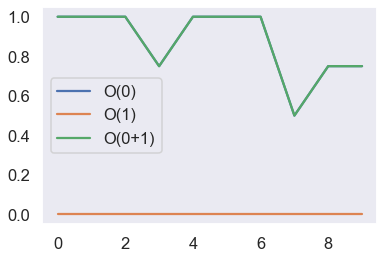

In [39]:
plt.plot(np.array(paths_weighted_in_output)[:,0],label='O(0)')
plt.plot(np.array(paths_weighted_in_output)[:,1],label='O(1)')
plt.plot(np.array(paths_weighted_in_output)[:,0]+np.array(paths_weighted_in_output)[:,1],label='O(0+1)')
plt.legend()

Text(0.5, 0, '% of recovery')

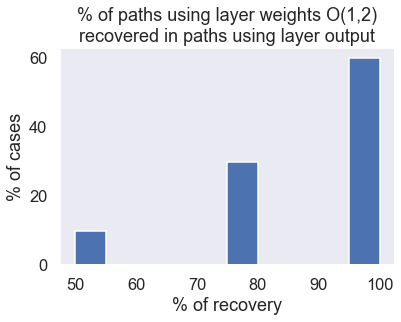

In [40]:
yh,xh=np.histogram(np.array(paths_weighted_in_output)[:,0]+np.array(paths_weighted_in_output)[:,1])
plt.bar([(xh[i]+xh[i+1])*0.5*100 for i in range(len(xh)-1)],yh*100/nreal,width=5)
plt.title('% of paths using layer weights O(1,2)\nrecovered in paths using layer output')
plt.ylabel('% of cases')
plt.xlabel('% of recovery')

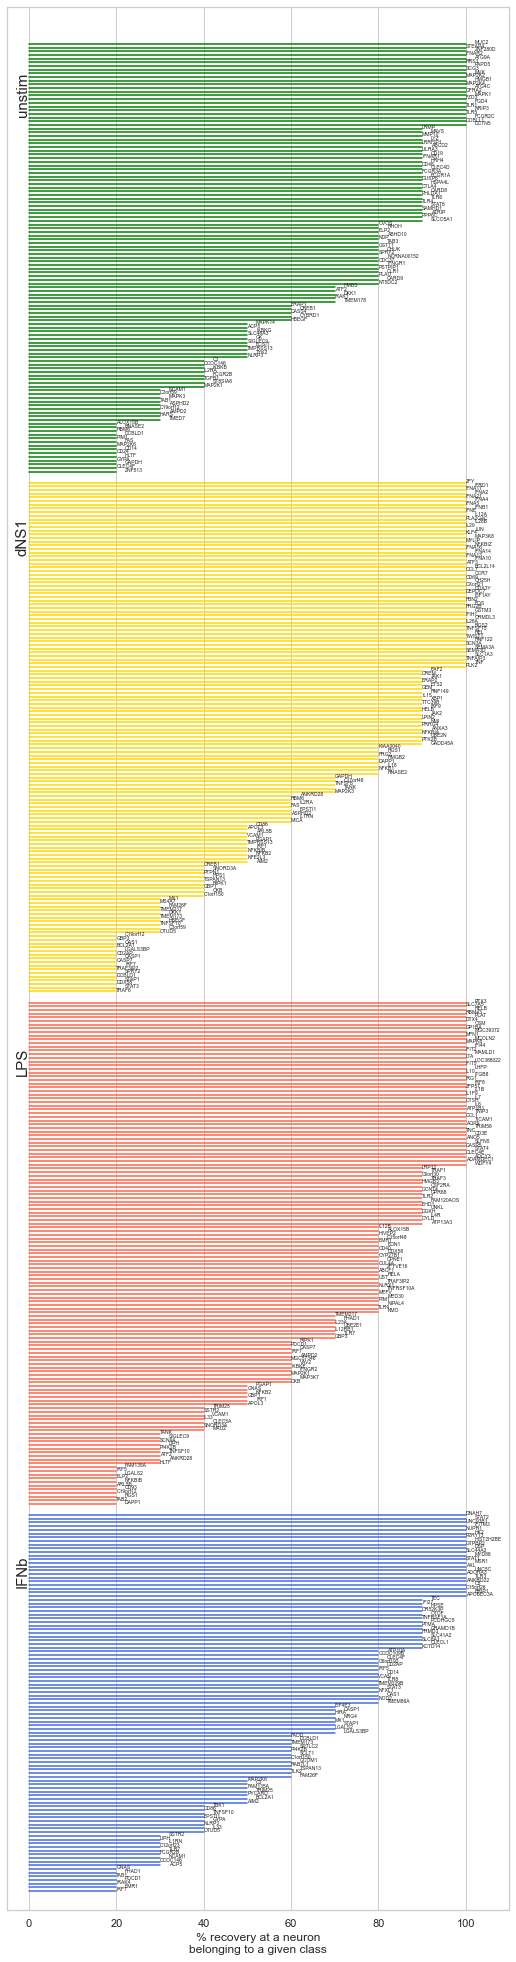

In [41]:
sns.set(style='whitegrid')
fig,ax = plt.subplots(1,1,figsize=(9,35))
col_class =[ 'royalblue','tomato','gold','green']
cc= 0
yl = []
threshold = 2
gene_dict = {0:[],1:[],2:[],3:[]}

for ci in range(4):
    buff_df = edf[edf==ci].dropna(how='all',axis=1).count()
    buff_df=buff_df[buff_df>=threshold].sort_values()
    
    for bdi,buff_df_i in enumerate(buff_df):
        gene_dict[ci].append(buff_df.index[bdi])
        plt.plot([0,buff_df_i*10],[cc,cc],color=col_class[ci])
        plt.annotate(buff_df.index[bdi],xy=[buff_df_i*10 +2*(cc%2),cc],size=5,xycoords='data')

        cc+=1
    plt.annotate(classes[ci],xy=[-3,cc-20],xycoords='data',rotation=90,size=15)
    cc+=2
    yl.extend(buff_df.index)
ax.set_yticks([])
ax.set_yticklabels('')
plt.xlim(-5,110)
plt.ylim(-5,len(yl)+15)
plt.xlabel('% recovery at a neuron\nbelonging to a given class')
plt.savefig('GE_dist.png',dpi=300);

0
1
2
[7, 4, 0]
[1, 2, 1]
[2, 1, 2]
[6, 3, 3]


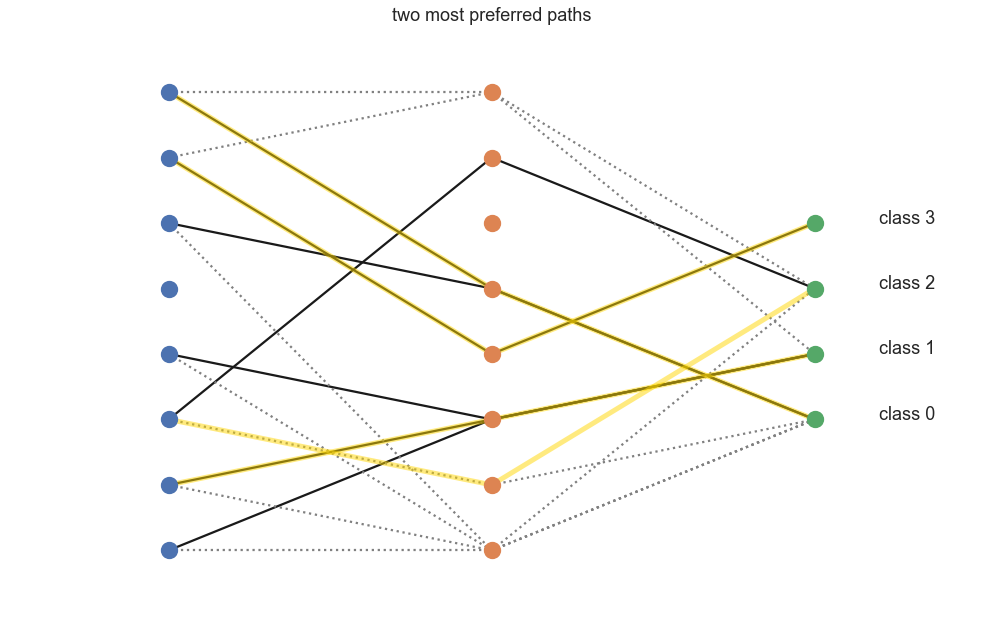

In [42]:
mat = [8,8,4]

mat_imp = [[],[],[]]

sns.set(style='dark',context='talk')
plt.figure(figsize=(14,9))

x_pts = np.arange(-0.5,len(mat)+0.5)

for mi in range(len(mat)):
    print(mi)
    if len(mat_imp[mi])>0:
        plt.scatter(np.zeros(mat[mi])+mi, np.arange(mat[mi]) + (np.max(mat) - mat[mi])*0.5,s=1200*np.array(mat_imp[mi]))
    else:
        plt.scatter(np.zeros(mat[mi])+mi, np.arange(mat[mi]) + (np.max(mat) - mat[mi])*0.5,s=250)

# for i,pi in enumerate(np.unique(tm_12_0)):
#     for mi in range(len(pi)-1):
#         plt.plot([mi,mi+1],[int(pi[mi])+ (np.max(mat) - mat[mi])*0.5,int(pi[mi+1]) + (np.max(mat) - mat[mi+1])*0.5],c='k',zorder=-1)

# for i,pi in enumerate(np.unique(tm_12_1)):
#     for mi in range(len(pi)-1):
#         plt.plot([mi,mi+1],[int(pi[mi])+ (np.max(mat) - mat[mi])*0.5,int(pi[mi+1]) + (np.max(mat) - mat[mi+1])*0.5],c='k',zorder=-1)

for i,pi in enumerate(paths_0):
    for mi in range(len(pi)-1):
        plt.plot([mi,mi+1],[int(pi[mi])+ (np.max(mat) - mat[mi])*0.5,int(pi[mi+1]) + (np.max(mat) - mat[mi+1])*0.5],c='k',zorder=-1)

for i,pi in enumerate(paths_1):
    for mi in range(len(pi)-1):
        plt.plot([mi,mi+1],[int(pi[mi])+ (np.max(mat) - mat[mi])*0.5,int(pi[mi+1]) + (np.max(mat) - mat[mi+1])*0.5],c='grey',linestyle='dotted',zorder=-1)


for i,pi in enumerate(cpaths_most_likely):
    print(pi)
    for mi in range(len(pi)-1):
        plt.plot([mi,mi+1],[pi[mi]+ (np.max(mat) - mat[mi])*0.5,pi[mi+1]+ (np.max(mat) - mat[mi+1])*0.5],c='gold',lw=5,alpha=0.5,zorder=-1)

for i in range(4):
    plt.annotate('class '+str(i),xy=[2+.2,i+ (np.max(mat) - np.min(mat))*0.5],
                 xycoords='data')
        

plt.xlim(x_pts[0],x_pts[-1])
plt.ylim(-1,np.max(mat))

plt.title('two most preferred paths')
# plt.annotate(str(cmat),xy=(1.5,7), xycoords='data')
plt.axis('off')
plt.tight_layout()
plt.savefig('GE_most_pref_paths.png',dpi=250)
